In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [3]:
boston = pd.read_csv('Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [4]:
# extract all columns except Target column
boston_date = boston.drop(['Target'], axis=1)
boston_date.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


### 1978 Boston housing price data

- 1. AGE : rate of housing built before 1940
- 2. B : rate of black in population
- 3. RM : number of rooms per house
- 4. DIS : distance b/w job
- 5. INDUS : property of non commercial area
- 6. LSTAT : rate of lower class population 
- 7. NOX : concentration of nitrogen monoxide
- 8. PTRATIO : student/teacher ratio
- 9. RAD : distance to highway 
- 10. ZN : rate of living area that exceeds 25,000 ft^2
- 11. TAX : income tax
- 12. CHAS : located near Chales River yeas=1,  no=0

### Make simple regression models for crim/rm/lstat variables

In [5]:
target = boston[['Target']]
crim = boston[['CRIM']]
rm = boston[['RM']]
LSTAT = boston[['LSTAT']]
target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
crim1 = sm.add_constant(crim, has_constant='add')
crim1

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [7]:
# fit model
model1 = sm.OLS(target, crim1)
fitted_model = model1.fit()


In [8]:
#print out using summary function
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.17e-19
Time:                        14:22:36   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
fitted_model.params # finding coefficient

const    24.033106
CRIM     -0.415190
dtype: float64

### y_hattt = beta0 + beta1 * X 

In [10]:
np.dot(crim1, fitted_model.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [11]:
# find yhat using predict function
pred1 = fitted_model.predict(crim1)
pred1

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [12]:
np.dot(crim1, fitted_model.params) - pred1

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

### fitted graph visualization

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


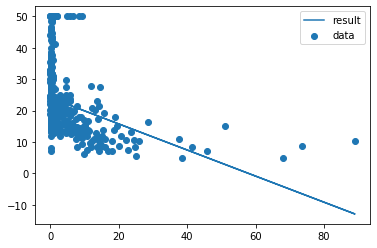

In [14]:
import matplotlib.pyplot as plt
plt.yticks(fontname='arial')
plt.scatter(crim, target, label='data')
plt.plot(crim, pred1, label='result')
plt.legend()
plt.show()

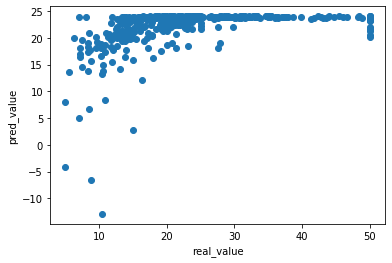

In [15]:
plt.scatter(target, pred1)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

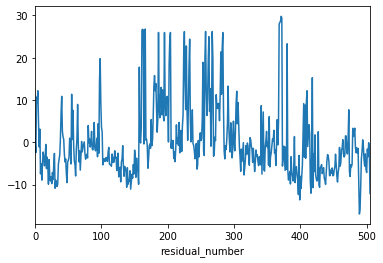

In [16]:
## residual visualization
fitted_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

In [17]:
# finding the sum of residual in fitted model
np.sum(fitted_model.resid)

-3.524291969370097e-12

### finding simple regression model for rm variable 

In [18]:
rm1 = sm.add_constant(rm, has_constant='add')
LSTAT1 = sm.add_constant(LSTAT, has_constant='add')

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
# fit regression model, sm.OLS
model2 = sm.OLS(target, rm1)
fitted_model2 = model2.fit()

model3 = sm.OLS(target, LSTAT1)
fitted_model3 = model3.fit()

In [20]:
# print out rm model 
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           2.49e-74
Time:                        14:23:51   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           5.08e-88
Time:                        14:23:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# predict yhat for each variables
pred2 = fitted_model2.predict(rm1)

pred3 = fitted_model3.predict(LSTAT1)

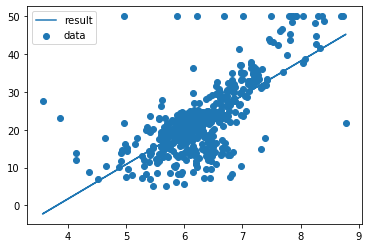

In [23]:
# for pred2
import matplotlib.pyplot as plt
plt.yticks(fontname='arial')
plt.scatter(rm, target, label='data')
plt.plot(rm, pred2, label='result')
plt.legend()
plt.show()

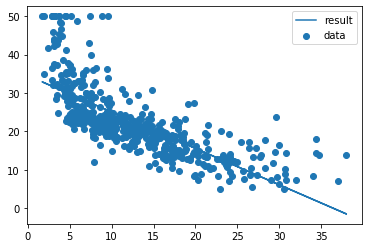

In [24]:
# for pred3
import matplotlib.pyplot as plt
plt.yticks(fontname='arial')
plt.scatter(LSTAT, target, label='data')
plt.plot(LSTAT, pred3, label='result')
plt.legend()
plt.show()

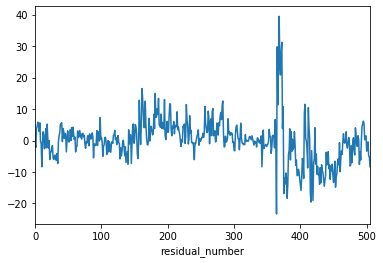

In [25]:
## residual visualization for pred2
fitted_model2.resid.plot()
plt.xlabel('residual_number')
plt.show()

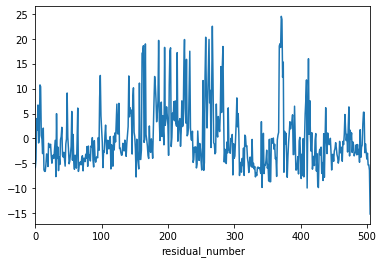

In [26]:
## residual visualization for pred3
fitted_model3.resid.plot()
plt.xlabel('residual_number')
plt.show()

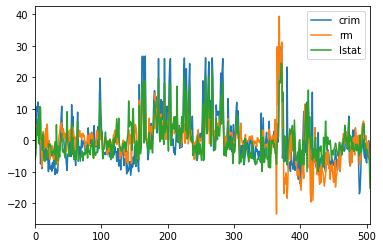

In [27]:
# all comparing residuals for all 3 models
fitted_model.resid.plot(label='crim')
fitted_model2.resid.plot(label='rm')
fitted_model3.resid.plot(label='lstat')
plt.legend()

### Multiple regression model
- using crim, rm, lstat

In [29]:
x_data = boston[['CRIM', 'RM', 'LSTAT']]
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [30]:
# add constant
x_data1 = sm.add_constant(x_data, has_constant='add')

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
# fit into model
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [32]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.01e-112
Time:                        14:47:20   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### compare simple regression model

In [34]:
# simple regression coefficient 
print(fitted_model.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
CRIM     -0.415190
dtype: float64
const   -34.670621
RM        9.102109
dtype: float64
const    34.553841
LSTAT    -0.950049
dtype: float64


In [35]:
# multiple regression coefficient
print(fitted_multi_model.params)

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


### find beta using row and column

In [42]:
from numpy import linalg # (X'X)-1X'y

ba = linalg.inv(np.dot(x_data1.T, x_data1))
np.dot(np.dot(ba, x_data1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

In [44]:
# find y_hat
pred4 = fitted_multi_model.predict(x_data1)

### residual plot

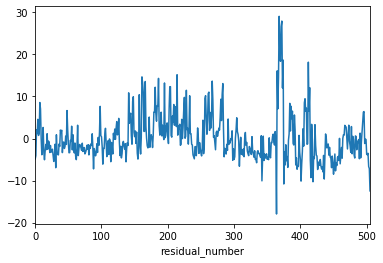

In [45]:
fitted_multi_model.resid.plot()
plt.xlabel('residual_number')
plt.show()

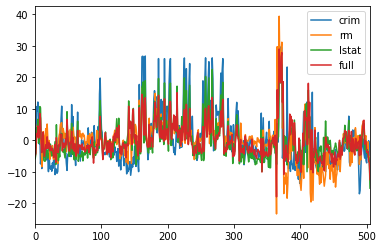

In [46]:
fitted_model.resid.plot(label='crim')
fitted_model2.resid.plot(label='rm')
fitted_model3.resid.plot(label='lstat')
fitted_multi_model.resid.plot(label='full')
plt.legend()